In [1]:
from utils import change_pwd
change_pwd()


In [2]:
from train_utils import make_ppo_models


name, model_name, category = "crafter", "impala", "crafter"
actor, critic = make_ppo_models(name, model_name, category)

/home/renos/rl/torchrl/data/replay_buffers/samplers.py:37: UserWarning: Failed to import torchrl C++ binaries. Some modules (eg, prioritized replay buffers) may not work with your installation. If you installed TorchRL from PyPI, please report the bug on TorchRL github. If you installed TorchRL locally and/or in development mode, check that you have all the required compiling packages.
  warnings.warn(EXTENSION_WARNING)
/home/renos/anaconda3/envs/torchrl2/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.num_envs to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.num_envs` for environment variables or `env.get_wrapper_attr('num_envs')` that will search the reminding wrappers.
  logger.warn(
/home/renos/anaconda3/envs/torchrl2/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.reward_space to get variables from other wrappers is deprecated and will be removed in v1.

0.6389431042462724 {'batch_norm': False, 'group_norm_groups': 1}
0.6389431042462724 {'batch_norm': False, 'group_norm_groups': 1}
0.6389431042462724 {'batch_norm': False, 'group_norm_groups': 1}
0.6389431042462724 {'batch_norm': False, 'group_norm_groups': 1}
0.6389431042462724 {'batch_norm': False, 'group_norm_groups': 1}
0.6389431042462724 {'batch_norm': False, 'group_norm_groups': 1}


In [3]:
actor_path = "/home/renos/rl-concepts/outputs/2024-02-20/14-33-49/checkpoints/checkpoint_9764864.pt"

In [4]:
import torch
actor_state_dict = torch.load(actor_path)

In [5]:
actor.load_state_dict(actor_state_dict)

<All keys matched successfully>

In [6]:
from crafter import make_parallel_env_impala

env = make_parallel_env_impala("anything",1, device='cpu', is_test=True)

In [7]:
env.reset()
tensordict = env.rollout(max_steps=1000, policy=actor)

In [9]:
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import numpy as np
import random
action_space = env.action_space
# Create a figure for plotting
fig, ax = plt.subplots()

# Function to update the plot with each frame
def update(frame):

    ax.clear()  # Clear previous frame
    ax.axis('off')  # Hide axes
    raw_obs = tensordict["render_pixels"][0, frame].cpu().numpy() 
    obs = raw_obs
    #obs = np.transpose(raw_obs, (1, 2, 0))
    #obs = (obs * 255).astype(np.uint8)  # Convert to 8-bit integer
    obs = obs.astype(np.uint8)  # Convert to 8-bit integer
    ax.imshow(obs)  # Show current observation
    return ax,

# Create an animation
ani = FuncAnimation(fig, update, frames=range(tensordict["render_pixels"].shape[1]), blit=False)

plt.close(fig)  # Prevent displaying a static plot

# Save the animation as an MP4 file
ani.save('/home/renos/rl-concepts/omg.mp4', writer='ffmpeg', dpi=80, fps=30)

/tmp/ipykernel_3351869/504570762.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


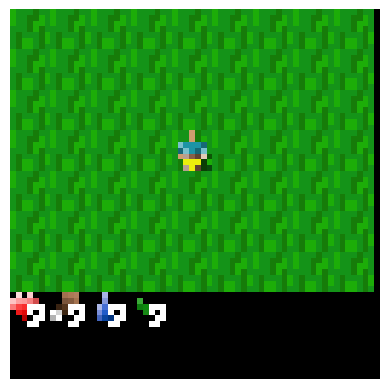

In [15]:
fig, ax = plt.subplots()
ax.clear()  # Clear previous frame
ax.axis('off')  # Hide axes
raw_obs = tensordict["pixels"][0, 0].cpu().numpy() 
obs = raw_obs
obs = np.transpose(raw_obs, (1, 2, 0))
obs = (obs * 255).astype(np.uint8)  # Convert to 8-bit integer
#obs = obs.astype(np.uint8)  # Convert to 8-bit integer
ax.imshow(obs)  # Show current observation
fig.show()

In [5]:


for episode_num in range(10):
    env.reset()
    tensordict = env.rollout(max_steps=1000, policy=actor)
    def update(frame):
    
        ax.clear()  # Clear previous frame
        ax.axis('off')  # Hide axes
        raw_obs = tensordict["render_pixels"][0, frame].cpu().numpy() 
        obs = raw_obs
        #obs = np.transpose(raw_obs, (1, 2, 0))
        #obs = (obs * 255).astype(np.uint8)  # Convert to 8-bit integer
        obs = obs.astype(np.uint8)  # Convert to 8-bit integer
        ax.imshow(obs)  # Show current observation
        return ax,

    # Create an animation
    ani = FuncAnimation(fig, update, frames=range(tensordict["render_pixels"].shape[1]), blit=False)

    plt.close(fig)  # Prevent displaying a static plot

    # Save the animation as an MP4 file
    ani.save(f'/home/renos/rl-concepts/crafter_videos/{episode_num}.mp4', writer='ffmpeg', dpi=80, fps=30)

KeyboardInterrupt: 

In [2]:
from train_utils import make_ppo_models

name, model_name, category = "crafter", "impala_achievements", "crafter"
model_params = {"joint_n_layers": 2,
    "posenc_n_layers": 1,
    "history_n_layers": 2,
    "status_n_layers": 1}


#actor_path = "/home/renos/rl-concepts/outputs/2024-02-22/14-40-13/checkpoints/checkpoint_2887680.pt"
#actor_path = "/home/renos/rl-concepts/outputs/2024-02-22/22-49-14/checkpoints/checkpoint_3686400.pt"
#actor_path = "/home/renos/rl-concepts/outputs/2024-02-23/09-19-27/checkpoints/checkpoint_1847296.pt"
#actor_path = "/home/renos/rl-concepts/outputs/2024-02-24/10-40-31/checkpoints/checkpoint_2924544.pt"
#actor_path = "/home/renos/rl-concepts/outputs/2024-02-24/10-36-14/checkpoints/checkpoint_3125248.pt"
#actor_path = "/home/renos/rl-concepts/multirun/2024-02-24/21-17-42/0/checkpoints/checkpoint_1966080.pt"
#actor_path = "/home/renos/rl-concepts/multirun/2024-02-24/21-17-42/4/checkpoints/checkpoint_1966080.pt"
#actor_path = "/home/renos/rl-concepts/multirun/2024-02-25/18-26-49/15/checkpoints/checkpoint_204800.pt"
model_params = {'joint_n_layers': 1, 'posenc_n_layers': 2, 'history_n_layers': 3, 'status_n_layers': 3, "use_pixels": False}
actor_path = "/home/renos/rl-concepts/outputs/2024-02-25/20-19-28/checkpoints/checkpoint_606208.pt"
actor, critic = make_ppo_models(name, model_name, category, model_params=model_params, task='default')

import torch
actor_state_dict = torch.load(actor_path)
actor.load_state_dict(actor_state_dict)

from crafter import make_parallel_env_impala

env = make_parallel_env_impala("anything","default", 1, device='cpu', is_test=True)

env.reset()
tensordict = env.rollout(max_steps=1000, policy=actor)

import os
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
for episode_num in range(10):
    env.reset()
    tensordict = env.rollout(max_steps=1000, policy=actor)
    def update(frame):
    
        ax.clear()  # Clear previous frame
        ax.axis('off')  # Hide axes
        raw_obs = tensordict["render_pixels"][0, frame].cpu().numpy() 
        obs = raw_obs
        #obs = np.transpose(raw_obs, (1, 2, 0))
        #obs = (obs * 255).astype(np.uint8)  # Convert to 8-bit integer
        obs = obs.astype(np.uint8)  # Convert to 8-bit integer
        ax.imshow(obs)  # Show current observation
        return ax,

    # Create an animation
    ani = FuncAnimation(fig, update, frames=range(tensordict["render_pixels"].shape[1]), blit=False)

    plt.close(fig)  # Prevent displaying a static plot

    # Save the animation as an MP4 file
    directory = actor_path.rsplit('/', 1)[0]
    os.makedirs(f'{directory}/crafter_videos', exist_ok=True)
    ani.save(f'{directory}/crafter_videos/{episode_num}.mp4', writer='ffmpeg', dpi=80, fps=10)


/home/renos/rl/torchrl/data/replay_buffers/samplers.py:37: UserWarning: Failed to import torchrl C++ binaries. Some modules (eg, prioritized replay buffers) may not work with your installation. If you installed TorchRL from PyPI, please report the bug on TorchRL github. If you installed TorchRL locally and/or in development mode, check that you have all the required compiling packages.
  warnings.warn(EXTENSION_WARNING)
/home/renos/anaconda3/envs/torchrl2/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.num_envs to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.num_envs` for environment variables or `env.get_wrapper_attr('num_envs')` that will search the reminding wrappers.
  logger.warn(
/home/renos/anaconda3/envs/torchrl2/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.reward_space to get variables from other wrappers is deprecated and will be removed in v1.